
# EDA Dataset de Violencia de Género: 
## Análisis exploratorio de datos usando la librería spaCy

## Resumen

   A partir de un dataset que contiene diversos datos sobre denuncias de situaciones de violencia de género, provisto por el Juzgado Penal Contravencional y Faltas N° 10 de la Ciudad de Buenos Aires, se van a analizar las frases agresivas que fueron cargadas junto con las denuncias de violencia de género. Este dataset contiene casi 4000 filas con información, e incluye una columna denominada “frases de agresión”. Se realizará el análisis exploratorio de datos y se utilizarán las herramientas de NLP para identificar si existen amenazas en el conjunto de frases, marcando así cada frase como amenazante o no amenazante.

## Marco Teorico

### Inteligencia Artificial 

En *Inteligencia Artificial: Un Enfoque Moderno*, se mencionan los cuatro enfoques que se pueden tomar al intentar definir la inteligencia artificial. Por un lado aquellas definiciones que miden el éxito en relación a la medida en la que se llega a imitar el comportamiento humano, y en contraste aquellas que miden el éxito según la racionalidad o la capacidad de producir resultados correctos. Estos distintos enfoques producen distintas definiciones de la inteligencia artificial: 

- Sistemas que piensan como humanos: "La automatización de actividades que vinculamos con procesos de pensamiento humanos, actividades como la toma de decisiones, resolución de problemas, aprendizaje..." (Bellman, 1978)
- Sistemas que actúan como humanos: "El arte de desarrollar máquinas con capacidades para realizar funciones que cuando son realizadas por personas requieren de inteligencia" (Kurzweil, 1990)
- Sistemas que piensan racionalmente: "El estudio de las facultades mentales mediante el uso de modelos computacionales"(Charniak y McDermott, 1985)
- Sistemas que actúan racionalmente:" El estudio del diseño de agentes inteligentes" (Poole, 1998) o bien "conductas inteligentes en artefactos" (Nilsson 1998)

Entonces se puede decir que la inteligencia artificial es una disciplina informática que estudia y desarrolla sistemas inteligentes, y busca construir programas que puedan lograr las metas en situaciones de sentido común.

### NLP 
El procesamiento del lenguaje natural es una rama de la inteligencia artificial que se ocupa de la manipulación del lenguaje humano de forma tal que una máquina pueda interpretar dicho lenguaje. Se puede decir que funciona como una herramienta para la comunicación entre las computadoras y los humanos. 
A partir de tareas como el análisis sintáctico, el etiquetado de la parte del habla (Part of speech tag) y la lematización se analizan las oraciones y su significado, haciendo posible que se interprete el texto y se saquen diversas conclusiones, como el sentimiento del mismo, o las partes más importantes. 
Para esto se dividen las distintas palabras del texto en tokens y se exploran sus relaciones entre sí. El proceso de análisis se realiza entrenando una red neuronal para que logre realizar predicciones sobre el texto que se quiere procesar.


### Spacy
SpaCy es una biblioteca de procesamiento de lenguaje natural Python gratuita y open-source. Fue diseñada específicamente para la producción de algoritmos que puedan procesar  y entender grandes volúmenes de texto. La librería usa redes neuronales convolucionales para realizar part-of-speech tagging, dependency parsing, categorización de texto y reconocimiento de entidades(NER). SpaCy ofrece modelos estadísticos pre entrenados  en varios idiomas, que se pueden instalar como modelos de python, existen diferentes modelos de diversos tamaños para que se ajusten mejor a la necesidad particular de cada caso.
SpaCy funciona con un pipeline de procesamiento. Al llamar al método nlp de spacy sobre un texto, este pasa por todos los componentes del pipeline para ser procesado. En primer lugar se pasa por el tokenizer, que separa el texto en tokens, y produce el objeto Doc. Este objeto doc luego pasa por el resto de los componentes del pipeline, donde cada uno dispone de la información recolectada por todos los componentes  anteriores.

<img src= 'https://d33wubrfki0l68.cloudfront.net/16b2ccafeefd6d547171afa23f9ac62f159e353d/48b91/pipeline-7a14d4edd18f3edfee8f34393bff2992.svg' width="700">

En primer lugar el tagger asigna los part of speech tags, luego el parser asigna las dependencias y named entity recognizer detecta las entidades nombradas. Existen otros componentes del pipeline que no están presentes en todos los modelos, como por ejemplo el lemmatizer, que da la forma en infinitivo de los tokens, y el text categorizer que categoriza el texto en dos o más categorías. También es posible añadir componentes personalizados al pipeline; estos pueden ser ejecutados antes o después de cualquiera de los otros componentes. 
	Spacy también tiene distintas herramientas que se pueden utilizar sobre los objetos doc o sobre textos, para obtener más información de los mismos. Por ejemplo la herramienta Matcher que busca tokens o secuencias de tokens que cumplan con un cierto patrón, o la herramienta Similarity que compara la similitud de dos objetos.



## Introducción

Según la ONU la violencia de género se entiende como "*los actos dañinos dirigidos contra una persona o un grupo de personas en razón de su género. Tiene su origen en la desigualdad de género, el abuso de poder y la existencia de normas dañinas.*" La organización marca que este tipo de violencia se da de forma desproporcionada hacia mujeres y niñas, y también se puede emplear el término para describir la violencia dirigida contra las poblaciones LGBTQI+. Se define en particular la violencia contra las mujeres y las niñas como todo acto de violencia basado en el género que tenga o pueda tener como resultado un daño o sufrimiento físico, sexual o mental para la mujer, así como las amenazas de tales actos, la coacción o la privación arbitraria de la libertad, tanto si se producen en la vida pública como en la vida privada. Y distinguen entre distintos tipos de violencia: física, psicológica, sexual, económica y patrimonial, y simbólica. Estos tipos de violencia estan definidos en la ley 26.485 de proteccion integral a las mujeres.

La definición anterior menciona que la violencia de género tiene su origen en la desigualdad de género, el abuso de poder y las normas dañinas. Como estos fenómenos sociales son la raíz de este tipo de violencia,  se debe entender a la violencia de género necesariamente desde una perspectiva sociológica. En Apuntes sobre violencia de género, la doctora en sociología Raquel Osborne afirma: “*Desde la perspectiva de género, la violencia de género responde a un fenómeno estructural para el mantenimiento de la desigualdad entre los sexos. Es una forma de ejercicio del poder para perpetuar la dominación sexista. Precisamente por este carácter estructural, está mucho más tolerada y, por ende, extendida—de lo que, a menudo pensamos. Quienes agreden por motivos sexistas no están haciendo, sino llevar al extremo conductas que se consideran «normales» y que responden, en última instancia a unos modelos apropiados para cada sexo. [...] Lo dicho hasta ahora no niega que las mujeres puedan ser violentas, pero existen importantes diferencias con respecto a los varones. Una de ellas reside en que la violencia no sólo no entra a formar parte de la socialización femenina sino que se promueve sobre todo la asociación de lo femenino con los valores ligados a la vida, a la maternidad, a la entrega y al cuidado. Los varones se caracterizan por los rasgos asociados a la masculinidad: fortaleza (no debilidad), competitividad, superioridad y agresividad, reforzados por la fratría, el grupo de los iguales. Es la teoría de los complementarios, que en términos de género se interpreta como una división del trabajo, jerárquicamente concebida. El ideal — autoasumido y heteroimpuesto— para las mujeres es, en palabras de Adrienne Rich (1983, pp. 148-149), «la adicción al "Amor" (en la carrera de una mujer se traduce en la idea de abnegación), amor a través del sacrificio como forma redentora». Esta «sobredosis de amor» femenino se la apropian los varones, en un entorno que lo favorece y lo aprueba socialmente, conduciendo a un déficit de igualdad que coloca a las mujeres en una situación de inferioridad.*”

Es importante entonces tener en cuenta esta visión estructural de la violencia contra las mujeres, y entender la misma como un mecanismo de control que si bien se ejerce en casos particulares afecta a todas las mujeres como conjunto. Osborne también destaca que la violencia de género es un producto de la sociedad en la que estos actos violentos se presentan y los roles de género que esta asigna. El psicoterapeuta Luis Bonino habla de comportamientos "invisibles" de violencia y dominación que realizan los varones y que denomina micromachismos. Estos son los actos cotidianos que ejercen el machismo y hacen a la normalización en la sociedad de la percepción de las mujeres como inferiores, y a la perpetuación de los roles de género que mencionaba Osborne. La aceptación de los micromachismos nos muestran donde nacen las actitudes o pensamientos sociales que se extienden hasta llegar a los casos extremos como el femicidio, pero se presentan previamente en la forma de 'violencia simbolica'.

En Argentina previo al año 2015 no existían estadísticas oficiales sobre femicidios ni violencia de género, pero organizaciones no oficiales mostraban estadísticas aproximadas desde el año 2008. La creación del registro oficial fue una respuesta a la movilización social de Ni una menos de 2015, donde más de 300.000 personas marcharon en la Plaza del Congreso en Buenos Aires demandando acción por parte del estado para detener la violencia contra las mujeres. Hoy en día en Argentina existe legislación que busca proteger a las mujeres en estos casos de violencia.

Ley 26.485: La Ley de protección integral para prevenir, sancionar y erradicar la violencia contra las mujeres en los ámbitos en que desarrollen sus relaciones interpersonales

Ley 27.501, que incorpora el acoso callejero como modalidad de violencia a la mujer

Ley 27.499, "Ley Micaela", de capacitación obligatoria en género para todas las personas que integran los tres poderes del Estado

Ley 26.791 Decreto 2396/2012, que tipifica el homicidio agravado de mujeres.

La Unidad Fiscal Especializada de Violencia contra las Mujeres (UFEM) muestra estadísticas sobre femicidios en la Ciudad de Buenos Aires entre los años 2015 y 2018.
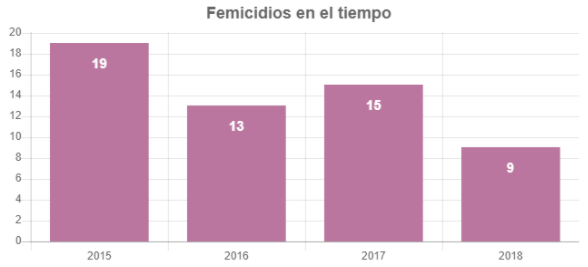




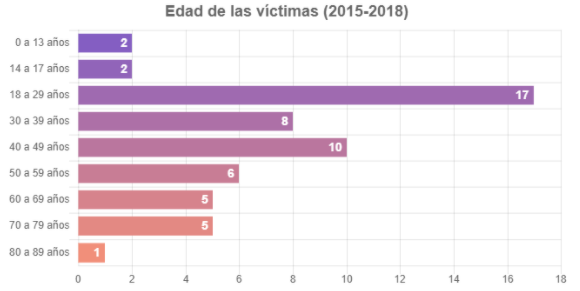

Estos últimos datos solo contemplan la ciudad de Buenos Aires, pero el Registro Nacional de Femicidios de la Justicia Argentina (RNFJA) contó en 2019 268 femicidios donde 252 fueron directos y 16 vinculados. Las 252 víctimas directas de femicidio incluyen 5 travesticidios/ transfemicidios. Donde el 90% de las víctimas conocían al agresor, en el 66% de los casos eran parejas o exparejas y en el 44% se encontraba conviviendo.

Actualmente con el avance en la tecnología, y sobre todo con las formas de comunicación que trajeron internet y las redes sociales, se formó una nueva vía por la cual la violencia se puede presentar. Esto hace que se dispongan de grandes volúmenes de datos con información que puede indicar una situación violenta, pero trae la necesidad de filtrar aquellas cosas que son relevantes de las que no lo son. La inteligencia artificial y, en particular, el procesamiento del lenguaje natural son herramientas que pueden ayudar a detectar la presencia de estas situaciones violentas en grandes volúmenes de datos.

## Problema

En primer lugar se busca realizar el análisis exploratorio de datos(EDA) del dataset provisto, identificando en el mismo las frases de agresión presentes. Dado que en el dataset existen celdas vacías, con información irrelevante o repetida, se busca formar un conjunto de frases únicas con las que se va a trabajar, y realizar un primer análisis de dichas frases.

Luego, trabajando con las frases del conjunto, se utilizarán diversas herramientas de NLP para identificar si existen amenazas en el conjunto de frases, marcando así cada una como amenazante o no amenazante.


 

## Desarrollo

#### EDA

El dataset trabajado fue provisto por el Juzgado Penal Contravencional y Faltas N° 10 de la Ciudad de Buenos Aires, este contiene diversos datos sobre denuncias de situaciones donde se presentó violencia de género e incluye un conjunto de frases agresivas que fueron dichas a la víctima de violencia, estas son las frases analizadas. Para realizar el análisis exploratorio de datos, en una primera instancia se identificaron en el dataset aquellas celdas con frases relevantes que pueden ser analizadas, es decir celdas no vacías, que tengan frases distintas a 'no corresponde' y que no estén repetidas.

Para trabajar con el dataset se crearon un par de funciones en un módulo que se llamó xl_text. Estas transforman las celdas con la información a textos que pueden ser procesados con spacy, realizan la distinción entre celdas relevantes y no relevantes del dataset.

In [ ]:
# en archivo xl_text:

    
def excel_to_set(doc, first_cell, last_cell):
    """
    Esta funcion devuelve una lista con todas las frases unicas
    almacenadas en un grupo de celdas de un archivo excel
    doc: string nombre del archivo excel a trabajar.
    first_cell: primera celda del rango a copiar.
    last_cell: ultima celda del rango a copiar
    """
    phrases = []
    excel_document = openpyxl.load_workbook(doc, data_only=True)
    first_sheet = excel_document.sheetnames[0]
    sheet = excel_document[first_sheet]
    rows = sheet[first_cell:last_cell]
    phrases = [cell.value.replace('_', ' ') for cell in row for row in rows if cell.value and cell.value != 'no_corresponde']
    return set(phrases)


def excel_to_text(doc, first_cell, last_cell):
    """ Esta funcion devuelve en forma de string los datos relevantes
    almacenados en un grupo de celdas de un archivo excel
        doc: string nombre del archivo excel a trabajar.
        first_cell: primera celda del rango a copiar.
        last_cell: ultima celda del rango a copiar
        """
    phrases = excel_to_set(doc, first_cell, last_cell)
    text = ""
    for phrase in phrases:
        text += f'{phrase}\n'
    return text


def num_relevant_cells(doc, first_cell, last_cell):
    """Esta funcion escribe por pantalla estadisticas de el numero de celdas
    con informacion no nula en un rango de celdas de una columna en un excel

    doc: string nombre del archivo excel a trabajar.
    first_cell: primera celda del rango
    last_cell: ultima celda del rango
    """
    percentage = 0
    relevant_cells = len(excel_to_set(doc, first_cell, last_cell))
    total = int(last_cell[1:]) - int(first_cell[1:]) # solo funciona si trabajo en la misma columna. Sino usaria otro loop
    if total != 0:
        percentage = relevant_cells * 100 / total
    print(f'el numero total de celdas: {total} \n'
          f'el numero total de celdas con informacion unica: {relevant_cells}\n'
          f'eso es un %{percentage:.2f} de celdas con informacion')

Usando esta última función se logró obtener el número de celdas del dataset que contienen información y qué porcentaje representan sobre el total de celdas.

In [1]:
from xl_text import num_relevant_cells

num_relevant_cells('set_de_datos_con_perspectiva_de_genero.xlsx', first_cell='S2', last_cell='S3827')

el numero total de celdas: 3825 
el numero total de celdas con informacion unica: 337
eso es un %8.81 de celdas con informacion


Se obtuvieron entonces 337 frases unicas que pueden ser analizadas.

Utilizando el modelo pre entrenado de spacy 'es_core_news_sm', un modelo entrenado usando noticias, se buscaron los part of speech tags, es decir la categoría gramatical de cada palabra y las dependency labels, es decir el análisis sintáctico que relaciona las palabras entre sí. Con este primer procesamiento se observan las frases encontradas y se analiza la estructura de las mismas. Este análisis estructural es beneficioso para lograr una mejor interpretación de los datos, y tener el primer acercamiento al contenido del dataset.
   

In [1]:
import spacy
from xl_text import excel_to_set 

texts = list(excel_to_set('set_de_datos_con_perspectiva_de_genero.xlsx', first_cell='S2', last_cell='S3827'))
nlp = spacy.load("es_core_news_sm")
docs = [nlp(text) for text in texts]

print("tokens, su part-of-speech tag y dependency label:\n")
for doc in docs:
    print(f'\n{doc.text}')
    for token in doc:
        print("{:<12}{:<10}{:<10}".format(token.text, token.pos_, token.dep_))

tokens, su part-of-speech tag y dependency label:


vos sos mia
vos         ADJ       ROOT      
sos         PROPN     flat      
mia         NOUN      compound  

hija de puta puta de mierda te voy a sacar a los hijos te voy a matar sino me das a mis hijos te voy a matar me las voy a cobrar todas las que me hiciste yo sin mis hijos no me voy a ir de esta casa  antes de irme te mato segui haciendo denuncias que asi te va a ir
hija        NOUN      nsubj     
de          ADP       case      
puta        NOUN      nmod      
puta        ADJ       amod      
de          ADP       case      
mierda      NOUN      nmod      
te          PRON      obj       
voy         AUX       aux       
a           ADP       mark      
sacar       VERB      ROOT      
a           ADP       case      
los         DET       det       
hijos       NOUN      obj       
te          PRON      obj       
voy         AUX       aux       
a           ADP       mark      
matar       VERB      xcomp     
sino     

toda        DET       det       
tu          DET       det       
vida        NOUN      obj       
asi         ADV       advmod    
te          PRON      obj       
falta       VERB      ROOT      
mucho       ADV       advmod    
para        ADP       mark      
bajar       VERB      advcl     
de          ADP       case      
peso        NOUN      obl       

puta lesbiana te fuiste con tus amigas si te veo con otro te voy a cagar apalos
puta        NOUN      nsubj     
lesbiana    ADJ       amod      
te          PRON      obj       
fuiste      VERB      ROOT      
con         ADP       case      
tus         DET       det       
amigas      NOUN      obj       
si          SCONJ     mark      
te          PRON      obj       
veo         VERB      advcl     
con         ADP       case      
otro        PRON      obj       
te          PRON      obj       
voy         AUX       aux       
a           ADP       mark      
cagar       VERB      advcl     
apalos      NOUN      xcomp 


te voy a matar   hace las cosas como debes
te          PRON      obj       
voy         AUX       aux       
a           ADP       mark      
matar       VERB      ROOT      
            SPACE               
hace        AUX       advcl     
las         DET       det       
cosas       NOUN      obj       
como        SCONJ     mark      
debes       AUX       obl       

te voy a matar hija de puta  manipuladora
te          PRON      obj       
voy         AUX       aux       
a           ADP       mark      
matar       VERB      ROOT      
hija        NOUN      obj       
de          ADP       case      
puta        NOUN      nmod      
            SPACE               
manipuladoraADJ       amod      

puta de mierda traes a tus machos aca te los voy a terminar matando hija de puta te voy a matar y despues me mato yo con quien estabas  callate te voy a romper la boca
puta        NOUN      nsubj     
de          ADP       case      
mierda      PROPN     nmod      
traes       AUX   

vuelva      VERB      conj      
a           ADP       mark      
consumir    VERB      xcomp     

te voy a cortar   no sabes con quien te metes
te          PRON      obj       
voy         AUX       aux       
a           ADP       mark      
cortar      VERB      csubj     
            SPACE               
no          ADV       advmod    
sabes       VERB      ROOT      
con         ADP       case      
quien       PRON      obl       
te          PRON      obj       
metes       VERB      ccomp     

te voy a matar vieja de mierda
te          PRON      obj       
voy         AUX       aux       
a           ADP       mark      
matar       VERB      ROOT      
vieja       ADJ       obj       
de          ADP       case      
mierda      NOUN      nmod      

pendeja de mierda vos no te tenes que meter sos una cualquiera como tu mama
pendeja     NOUN      nsubj     
de          ADP       case      
mierda      NOUN      nmod      
vos         ADJ       amod      
no          ADV    

hija de puta te voy a matar  voy a matar a tus hijos
hija        NOUN      nsubj     
de          ADP       case      
puta        NOUN      nmod      
te          PRON      obj       
voy         AUX       aux       
a           ADP       mark      
matar       VERB      ROOT      
            SPACE               
voy         AUX       aux       
a           ADP       mark      
matar       VERB      xcomp     
a           ADP       case      
tus         DET       det       
hijos       NOUN      obj       

nunca me vas a olvidar   si estas con alguien lo voy a hacer pelota
nunca       ADV       advmod    
me          PRON      iobj      
vas         VERB      ROOT      
a           ADP       mark      
olvidar     VERB      xcomp     
            SPACE               
si          SCONJ     mark      
estas       PRON      nsubj     
con         ADP       case      
alguien     PRON      nmod      
lo          PRON      obj       
voy         AUX       aux       
a           ADP     

matar       VERB      ROOT      
a           ADP       case      
vos         PROPN     obj       
y           CCONJ     cc        
a           ADP       case      
tu          DET       det       
hijo        NOUN      conj      

te voy a matar   te voy a prender fuego la casa   paraguaya de mierda   muerta de hambre
te          PRON      obj       
voy         AUX       aux       
a           ADP       mark      
matar       VERB      csubj     
            SPACE               
te          PRON      obj       
voy         AUX       aux       
a           ADP       mark      
prender     VERB      ROOT      
fuego       NOUN      compound  
la          DET       det       
casa        NOUN      obj       
            SPACE               
paraguaya   PROPN     flat      
de          ADP       case      
mierda      NOUN      nmod      
            SPACE               
muerta      ADJ       amod      
de          ADP       case      
hambre      NOUN      nmod      

yo tengo derecho d

hija        NOUN      appos     
de          ADP       case      
puta        NOUN      nmod      
            SPACE               
ya          ADV       advmod    
te          PRON      obj       
voy         AUX       aux       
a           ADP       mark      
enganchar   VERB      advcl     
asi         ADV       advmod    
como        SCONJ     mark      
vos         ADJ       obl       
me          PRON      obj       
estas       DET       aux       
cagando     VERB      advcl     
la          DET       det       
vida        NOUN      obj       
yo          PRON      nsubj     
te          PRON      iobj      
la          PRON      obj       
voy         AUX       aux       
a           ADP       mark      
cagar       VERB      xcomp     
a           ADP       case      
vos         PROPN     obj       
y           CCONJ     cc        
te          PRON      obj       
voy         AUX       aux       
a           ADP       mark      
pegar       VERB      conj      
donde     

Se puede observar que el modelo pre-entrenado logró identificar de forma satisfactoria los part of speech tags y las dependencias de los tokens en cada frase. Spacy también permite visualizar las dependencias de forma gráfica:

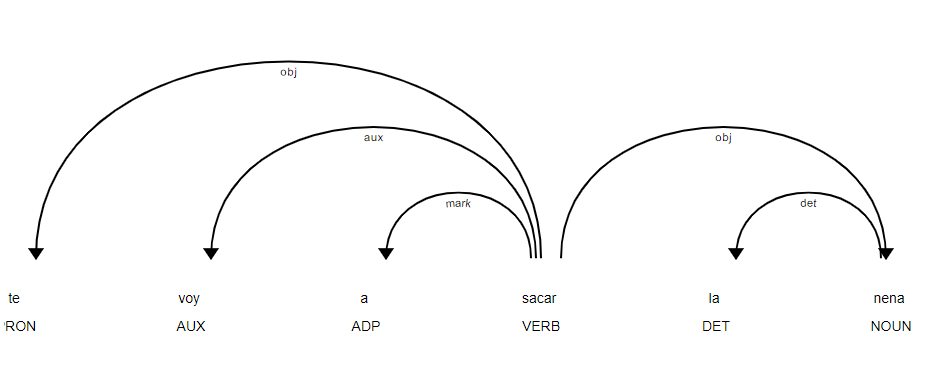

Spacy también busca entidades presentes en el texto y guarda estas entidades en un atributo del objeto Doc llamado doc.ents. Cada una de estas entidades tiene un label que identifica que tipo de entidad está presente, en español se distinguen cuatro tipos de entidades: lugares, organizaciones, personas y misceláneos (es decir aquellas entidades que no corresponden a ninguna de las otras tres categorias).


In [17]:
print("entidades identificadas :\n")

entities = [ent.text for doc in docs for ent in doc.ents]
types = [ent.label_ for doc in docs for ent in doc.ents]

dict = {'entidad' : entities, 
        'tipo' : types} 
df = pd.DataFrame(dict) 
pd.set_option('display.max_rows', None)
display(df) 

entidades identificadas :



,entidad,tipo
0,palos,LOC
1,vieja,LOC
2,gorda lechona,PER
3,soy,ORG
4,puta ahi estan tus machos,MISC
5,dia,ORG
6,trola,MISC
7,boca,ORG
8,servis,LOC
9,ocurra,LOC


En este caso se puede observar que no se lograron identificar correctamente entidades presentes.  Esto se debe a diversos factores, en primer lugar no hay muchas entidades en las frases del dataset, ya que las frases consisten en su mayoría en insultos o amenazas que una persona le hace a otra, en la mayoría de las frases no se mencionan lugares, organizaciones, o nombres propios; adicionalmente las frases del dataset se encuentran escritas en minúscula lo que hace que al modelo se le dificulte identificar entidades como tal.


####     Buscando frases amenazantes

Conociendo ya el contenido del dataset se puede explorar la capacidad de NLP para extraer información relevante. En este caso, la búsqueda de amenazas en los textos. Para esto se utilizaron las herramientas que provee spacy para el análisis de texto. 

Por ejemplo utilizando el PhraseMatcher de spacy se buscaron instancias de palabras que pueden indicar amenazas o una frase amenazante. Si se consideran las amenazas "matar", "prender fuego" o "incendiar"  es posible buscar instancias de estas palabras en el texto. 

In [5]:
from spacy.matcher import PhraseMatcher
from xl_text import excel_to_text

text = excel_to_text('set_de_datos_con_perspectiva_de_genero.xlsx', first_cell='S2', last_cell='S3827')
doc = nlp(text)
matcher = PhraseMatcher(nlp.vocab)
WORDS = ["matar", "prender fuego", "incendiar"]
patterns = [nlp(word) for word in WORDS]
matcher.add("AMENAZA_PATTERN", None, *patterns)

matches = matcher(doc)
threats = len(matches)
print(f'numero de apariciones de la palabra matar o similares: {threats}')

numero de apariciones de la palabra matar o similares: 143


Las palabras "matar", "prender fuego" o "incendiar" aparecen 143 veces en las 337 frases del dataset. En este caso se buscó en todas las frases como un texto entero, pero se puede aplicar de la misma forma a cada frase por separado.
Este método no hace más que encontrar instancias de palabras que ya se deben conocer y que deben estar escritas en el texto exactamente como fueron definidas para la búsqueda. No se encontrarían amenazas donde estas palabras no estén presentes, o estén por ejemplo conjugadas de forma diferente.


Otra posibilidad es entrenar a un modelo de spacy para identificar palabras particulares como un nuevo tipo de entidad de texto que será llamada 'amenaza'. 
Para esto se crearon dos funciones: get_training_data() y get_testing_data(), que separan el dataset en datos de entrenamiento y de testeo. La data de entrenamiento es pasada a un conjunto de objetos Docs con las entidades 'amenaza' ya identificadas. Para ahorrar tiempo, en lugar de crear la data de entrenamiento de forma manual se utilizó la herramienta Matcher de spacy para identificar y etiquetar las entidades automáticamente. Por esto, no todas las entidades de amenazas están etiquetadas, si el etiquetado de entidades se hiciera a mano los resultados del modelo serían más precisos. De todas maneras, a diferencia del PhraseMatcher, el Matcher permite definir patrones de búsqueda, por lo que en este caso se pudieron encontrar todas las instancias de palabras, sin importar su conjugación, utilizando su forma en infinitivo. 


In [5]:
import warnings
import random
import spacy
from spacy.matcher import Matcher
from xl_text import excel_to_set

def get_training_data():
    """ Esta funcion devuelve una lista de la forma [(frase ,{"entities": entities})...] 
        donde se encuentran 150 de las frases del dataset, y las entidades 'amenazas' presentes en ellas
    """
    nlp1 = spacy.load("es_core_news_sm")
    matcher = Matcher(nlp1.vocab)
    pattern_1 = [{"LEMMA": "matar"}]
    pattern_2 = [{"LEMMA": "incendiar"}]
    pattern_3 = [{"LEMMA": "pagar"}]
    pattern_4 = [{"LOWER": "fuego"}]
    matcher.add("AMENAZA", None, pattern_1, pattern_2, pattern_3, pattern_4)
    training_data = []
    txts = list(excel_to_set('set_de_datos_con_perspectiva_de_genero.xlsx', first_cell='S2', last_cell='S3827'))
    docs = [nlp1(text) for text in txts[:150]]
    for doc in docs:
        matches = matcher(doc)
        spans = [doc[start:end] for match_id, start, end in matches]
        entities = [(span.start_char, span.end_char, "AMENAZA") for span in spans]
        training_example = (doc.text, {"entities": entities})
        training_data.append(training_example)
    return training_data


def get_testing_data():
    """ Esta funcion devuelve una lista de frases del dataset desde la frase 150 en adelante """
    txts = list(excel_to_set('set_de_datos_con_perspectiva_de_genero.xlsx', first_cell='S2', last_cell='S3827'))
    return txts[150:]

nlp = spacy.load("es_core_news_sm")
ner = nlp.get_pipe("ner")
ner.add_label("AMENAZA")
TRAINING_DATA = get_training_data()
pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]  
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]  
with nlp.disable_pipes(*other_pipes), warnings.catch_warnings():  
    warnings.filterwarnings("once", category=UserWarning, module='spacy') 
    for itn in range(10):
        random.shuffle(TRAINING_DATA)
        losses = {}
        # Crea lotes con los ejemplos e itera sobre ellos
        for batch in spacy.util.minibatch(TRAINING_DATA, size=20):
            texts = [text for text, entities in batch]
            annotations = [entities for text, entities in batch]
            nlp.update(texts, annotations, losses=losses)
# path = Path('C:\Users\Usuario\Desktop\Practicas Profesionales')
# nlp.to_disk(path)


from IPython.display import display 
import pandas as pd 

TESTING_DATA = get_testing_data()
docs = [nlp(text) for text in TESTING_DATA]
num_ent = 0
num_thr = 0
phrases = []
threats = []

for doc in docs:
    phrases.append(doc.text)
    threats.append([(ent.text, ent.label_) for ent in doc.ents])
    num_ent += len(doc.ents) 
    if  len(doc.ents) > 0 :
        num_thr += 1
        
dict = {'frase' : phrases, 
        'amenazas' : threats} 
df = pd.DataFrame(dict) 
pd.set_option('display.max_rows', None)
pd.set_option("max_colwidth", 200)
display(df) 
        
print(f"el numero de entidades encontradas en {len(TESTING_DATA)} frases fue: {num_ent} entidades")
print(f' numero de frases con entidades: {num_thr}')

,frase,amenazas
0,no te hagas la viva que sabemos tus horarios y que vivis aca te hago un monton de hijos te parto en ocho ya te voy a agarrar te voy a hacer mierda,[]
1,sos una enferma de mierda hija de puta,[]
2,te voy a hacer quilombo en tu casa y en tu trabajo vieja de mierda llama a la policia aca espero hija de puta te voy a hacer echar del trabajo,[]
3,hoy te vas de esta casa con la policia no me vas a asustar,[]
4,puta de mierda te voy a matar,"[(matar, AMENAZA)]"
5,vos sos mia,[]
6,sos una hija de puta te voy a matar,"[(matar, AMENAZA)]"
7,hija de puta te voy a matar te voy a cortar en pedacitos,"[(matar, AMENAZA)]"
8,te voy a reventar la cabeza,[]
9,ahora se va a terminar todo se que andas con el,[]


el numero de entidades encontradas en 187 frases fue: 109 entidades
 numero de frases con entidades: 87


 Con estos datos se entrenó el modelo y se puede observar que se lograron identificar aproximadamente 100 entidades 'amenaza' en 186 frases. Si se buscara identificar si una frase es o no amenazante se puede suponer que si una frase tiene entidades amenazantes presentes entonces es amenazante, en ese caso habría identificado aproximadamente 90 frases como amenazantes de las 186 analizadas. 
 
 Utilizando este método para la búsqueda no se detectan todas las amenazas presentes, ya que no se encuentran las amenazas que no contienen las palabras definidas en el entrenamiento.


Para realizar un mejor análisis de las frases de agresión del dataset, se puede entrenar un nuevo componente en el pipeline de procesamiento llamado Text Categorizer. Este identifica la naturaleza de un texto procesado. En este caso se entrenó el Text Categorizer para que identifique si una frase es o no es amenazante. El dataset ya contiene una columna que indica la conducta de la persona acusada (amenazas, hostigamiento, incumplimiento de deberes familiares, etc.). Utilizando esta columna para identificar la clasificación se puede crear training data para entrenar al modelo.

Para crear la data de entrenamiento se llama a la función excel_to_data, que fue creada en el módulo xl_text. La función crea las listas de frases y de categorías de cada una usando la categorización ya realizada en el dataset, recorriendo paralelamente las columnas de “frases de agresión” y “conducta”. Esta forma de creación de la data de entrenamiento tampoco es tan efectiva como la creación manual de la data, ya que en algunos casos si bien las frases cargadas en "frases de agresión" pueden ser claramente interpretadas como amenazantes, se carga con una conducta como "portación de armas" o "incumplimiento de deberes familiares". Entonces una frase como "Te voy a matar no me dejas ver a mis hijos" probablemente sea interpretada por el categorizador como una amenaza, pero puede estar cargada en el dataset como "incumplimiento de deberes familiares" por las particularidades del caso. De todas formas esto se da en la minoría de los casos y el modelo debería lograr de todas formas predecir de forma correcta la categorización de las frases.

In [ ]:
# en modulo xl_text.py
import openpyxl

def excel_to_data(doc, first_cell_num, last_cell_num, col_phrases, col_cats):
    """ Esta funcion devuelve una lista con todas las frases unicas encontradas en un rango de celdas de un excel
    y una lista con las categorias amenazante, no amenazante para cada una de estas frases.
    doc: string nombre del archivo excel a trabajar.
    first_cell_num: numero de la primera celda del rango a copiar.
    last_cell_num:  numero de la ultima celda del rango a copiar
    col_phrases: columna donde estan las frases en el archivo doc
    col_cats: columna donde esta la clasificacion en el archivo doc
     """
    cat_list = []
    text_list = []
    excel_document = openpyxl.load_workbook(doc, data_only=True)
    first_sheet = excel_document.sheetnames[0]
    sheet = excel_document[first_sheet]
    for i in range(first_cell_num, last_cell_num):
        cell = sheet[col_phrases + str(i)]
        if cell.value and (cell.value != 'no corresponde') :
            text = cell.value.replace('_', ' ')
            if (text not in text_list):
                cat_cell = sheet[col_cats + str(i)]
                if cat_cell.value == 'amenazas':
                    cats = {'AMENAZANTE': 1, 'NO_AMENAZANTE': 0}
                else:
                    cats = {'AMENAZANTE': 0, 'NO_AMENAZANTE': 1}
                cat_list.append(cats)
                text_list.append(text)
    return text_list, cat_list


En este caso se entrenó sobre un modelo en blanco, pero también es posible entrenar el TextCategorizer sobre un modelo preexistente como  "es_core_news_sm".

Debido al bajo volumen de los datos para el entrenamiento se utilizó la arquitectura ensemble que provee spacy para el text categorizer, esta arquitectura es la más precisa de las tres posibles, pero es más lenta que las demás opciones.

Se tomaron 236 frases del dataset para el entrenamiento del TextCategorizer y las restantes fueron utilizadas para el testeo del modelo. El modelo es entrenado utilizando 20 iteraciones de entrenamiento, y para cada una de ellas se muestra precisión, recall y f_score haciendo posible monitorear la evolución del entrenamiento del modelo. Donde la precisión es el porcentaje de verdaderos positivos sobre el total de positivos encontrados, el recall es el porcentaje de verdaderos positivos sobre el total de positivos reales. Y el f-score o valor F es una media armónica de la precisión y el recall, que sirve para medir la exactitud a la que llega el modelo.

In [18]:
from __future__ import unicode_literals, print_function
import plac
import random
from xl_text import excel_to_data, excel_to_set
from pathlib import Path
import spacy
from spacy.util import minibatch, compounding


def evaluate(tokenizer, textcat, texts, cats):
    docs = (tokenizer(text) for text in texts)
    tp = 0.0  # True positives
    fp = 1e-8  # False positives
    fn = 1e-8  # False negatives
    tn = 0.0  # True negatives
    for i, doc in enumerate(textcat.pipe(docs)):
        gold = cats[i]
        for label, score in doc.cats.items():
            if label not in gold:
                continue
            if label == "NEGATIVE":
                continue
            if score >= 0.5 and gold[label] >= 0.5:
                tp += 1.0
            elif score >= 0.5 and gold[label] < 0.5:
                fp += 1.0
            elif score < 0.5 and gold[label] < 0.5:
                tn += 1
            elif score < 0.5 and gold[label] >= 0.5:
                fn += 1
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    if (precision + recall) == 0:
        f_score = 0.0
    else:
        f_score = 2 * (precision * recall) / (precision + recall)
    return {"textcat_p": precision, "textcat_r": recall, "textcat_f": f_score}


model=None
output_dir=None
n_iter=20
init_tok2vec=None

if output_dir is not None:
    output_dir = Path(output_dir)
    if not output_dir.exists():
        output_dir.mkdir()

if model is not None:
    nlp = spacy.load(model)
    print("Loaded model '%s'" % model)
else:
    nlp = spacy.blank("es")
    print("Created blank 'es' model")

# add the text classifier to the pipeline if it doesn't exist
if "textcat" not in nlp.pipe_names:
    textcat = nlp.create_pipe("textcat", config={"exclusive_classes": True, "architecture": "ensemble"})
    nlp.add_pipe(textcat, last=True)
else:
    textcat = nlp.get_pipe("textcat")

# add labels to text classifier
textcat.add_label("AMENAZANTE")
textcat.add_label("NO_AMENAZANTE")

texts, cats = excel_to_data("set_de_datos_con_perspectiva_de_genero.xlsx", 2, 2500, 'S', 'H')
train_texts = texts[:200]
dev_texts = texts[200:]
train_cats = cats[:200]
dev_cats = cats[200:]
train_data = list(zip(train_texts, [{"cats": cats} for cats in train_cats]))
print(f' Usando {len(texts)} ejemplos ({len(train_texts)} entrenamiento, {len(dev_texts)} evaluacion)')


# get names of other pipes to disable them during training
pipe_exceptions = ["textcat", "trf_wordpiecer", "trf_tok2vec"]
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
with nlp.disable_pipes(*other_pipes):
    optimizer = nlp.begin_training()
    if init_tok2vec is not None:
        with init_tok2vec.open("rb") as file_:
            textcat.model.tok2vec.from_bytes(file_.read())
    print("Entrenando el modelo...")
    print("{:^5}\t{:^5}\t{:^5}\t{:^5}".format("LOSS", "P", "R", "F"))
    batch_sizes = compounding(4.0, 32.0, 2.001)
    for i in range(n_iter):
        losses = {}
        random.shuffle(train_data)
        batches = minibatch(train_data, size=batch_sizes)
        for batch in batches:
            texts, annotations = zip(*batch)
            nlp.update(texts, annotations, sgd=optimizer, drop=0.2, losses=losses)
        with textcat.model.use_params(optimizer.averages):
            # evaluate on the dev data
            scores = evaluate(nlp.tokenizer, textcat, dev_texts, dev_cats)
        print(
            "{0:.3f}\t{1:.3f}\t{2:.3f}\t{3:.3f}".format( 
                losses["textcat"],
                scores["textcat_p"],
                scores["textcat_r"],
                scores["textcat_f"],
            )
        )

if output_dir is not None:
    with nlp.use_params(optimizer.averages):
        nlp.to_disk(output_dir)
    print(f"modelo guardado en:{output_dir}")


Created blank 'es' model
 Usando 236 ejemplos (200 entrenamiento, 36 evaluacion)
Entrenando el modelo...
LOSS 	  P  	  R  	  F  
0.047	0.444	0.444	0.444
0.008	0.444	0.444	0.444
0.008	0.444	0.444	0.444
0.005	0.444	0.444	0.444
0.008	0.472	0.472	0.472
0.010	0.528	0.528	0.528
0.006	0.583	0.583	0.583
0.004	0.639	0.639	0.639
0.007	0.639	0.639	0.639
0.006	0.667	0.667	0.667
0.007	0.639	0.639	0.639
0.001	0.667	0.667	0.667
0.006	0.667	0.667	0.667
0.001	0.667	0.667	0.667
0.002	0.667	0.667	0.667
0.002	0.694	0.694	0.694
0.001	0.667	0.667	0.667
0.001	0.639	0.639	0.639
0.001	0.611	0.611	0.611
0.001	0.611	0.611	0.611


Con este modelo ya entrenado se utilizan las frases restantes del dataset para probar el modelo en datos que nunca trabajo antes.

In [20]:
from IPython.display import display 
import pandas as pd 

texts = excel_to_set('set_de_datos_con_perspectiva_de_genero.xlsx', first_cell='S2500', last_cell='S3827')
docs = [nlp(text) for text in texts]
cats =[]
num_amen = 0
for doc in docs:
    if(doc.cats['AMENAZANTE'] > 0.7):
        cats.append('AMENAZANTE')
        num_amen += 1
    else:
        cats.append('NO AMENAZANTE')
# creating a DataFrame 
dict = {'frase' : [doc.text for doc in docs], 
        'categoria' : cats } 
pd.set_option('display.max_rows', None)
pd.set_option("max_colwidth", 140)
df = pd.DataFrame(dict) 
# displaying the DataFrame 
display(df) 
print(f'numero de frases a amenazantes:{num_amen}')

,frase,categoria
0,queres quedarte con negros no sabes quien soy yo,NO AMENAZANTE
1,puta de mierda te voy a matar,AMENAZANTE
2,esta quiere que me vaya quiere traer a sus machos,NO AMENAZANTE
3,negra de mierda,AMENAZANTE
4,te voy a matar levanta la causa sino te voy a matar,AMENAZANTE
5,los voy a matar a todos,AMENAZANTE
6,tenes la culpa de no perdonarme vos no entendes yo te voy a convertir,AMENAZANTE
7,vos sos mia,AMENAZANTE
8,hija de puta,AMENAZANTE
9,hija de puta te voy a matar te voy a cortar en pedacitos,AMENAZANTE


numero de frases a amenazantes:88


Al testear el modelo entrenado, se encontraron casi 100 frases amenazantes de las 147. Se observa entonces que con relativamente pocos ejemplos se logra entrenar un modelo que es capaz de identificar en la mayor parte de los casos, si el texto contiene o no amenazas.

Otra opción es entrenar un modelo con la totalidad de las frases que se encuentran en el dataset, ya que todas estas ya se encuentran clasificadas, y guardar el modelo para utilizarlo con otros textos. Esto sería beneficioso para el modelo, ya que dispondría de más ejemplos para el entrenamiento y podría lograr mayor precisión en sus predicciones. De todas formas lo ideal seria que la data de entrenamiento sea creada de forma manual para tener la certeza de que todas las frases están clasificadas de forma correcta.

**
**Copie el mismo codigo que antes pero use las frases clasificadas a mano para el entrenamiento.**

**en TD.xlsx estan las 337 frases copiadas y clasificadas como A: amenazante o N: no amenazante**

 **a partir de 10 a 15 ciclos de entrenamiento ya no mejora mas**

Para lograr mejores resultados, las frases fueron pasadas a un documento Excel y clasificadas como  A: amenazante o N: no amenazante. Al disminuir los errores en la data de entrenamiento con respecto a los métodos anteriores, se logran resultados mucho mejores, que alcanzan aproximadamente un 80% de precisión.

In [4]:
from __future__ import unicode_literals, print_function
import plac
import random
from xl_text import excel_to_set
from pathlib import Path
import spacy
from spacy.util import minibatch, compounding
import openpyxl

def excel_to_data(doc, first_cell_num, last_cell_num, col_phrases, col_cats):
    """ Esta funcion devuelve una lista con todas las frases unicas encontradas en un rango de celdas de un excel
    y una lista con las categorias amenazante, no amenazante para cada una de estas frases.
    doc: string nombre del archivo excel a trabajar.
    first_cell_num: numero de la primera celda del rango a copiar.
    last_cell_num:  numero de la ultima celda del rango a copiar
    col_phrases: columna donde estan las frases en el archivo doc
    col_cats: columna donde esta la clasificacion en el archivo doc
     """
    cat_list = []
    text_list = []
    excel_document = openpyxl.load_workbook(doc, data_only=True)
    first_sheet = excel_document.sheetnames[0]
    sheet = excel_document[first_sheet]
    for i in range(first_cell_num, last_cell_num):
        cell = sheet[col_phrases + str(i)]
        if cell.value :
            cat_cell = sheet[col_cats + str(i)]
            if cat_cell.value == 'A':
                cats = {'AMENAZANTE': 1, 'NO_AMENAZANTE': 0}
            else:
                cats = {'AMENAZANTE': 0, 'NO_AMENAZANTE': 1}
            cat_list.append(cats)
            text_list.append(cell.value)
    return text_list, cat_list


def evaluate(tokenizer, textcat, texts, cats):
    docs = (tokenizer(text) for text in texts)
    tp = 0.0  # True positives
    fp = 1e-8  # False positives
    fn = 1e-8  # False negatives
    tn = 0.0  # True negatives
    for i, doc in enumerate(textcat.pipe(docs)):
        gold = cats[i]
        for label, score in doc.cats.items():
            if label not in gold:
                continue
            if label == "NEGATIVE":
                continue
            if score >= 0.5 and gold[label] >= 0.5:
                tp += 1.0
            elif score >= 0.5 and gold[label] < 0.5:
                fp += 1.0
            elif score < 0.5 and gold[label] < 0.5:
                tn += 1
            elif score < 0.5 and gold[label] >= 0.5:
                fn += 1
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    if (precision + recall) == 0:
        f_score = 0.0
    else:
        f_score = 2 * (precision * recall) / (precision + recall)
    return {"textcat_p": precision, "textcat_r": recall, "textcat_f": f_score}



model=None
output_dir=None
n_iter=15
init_tok2vec=None  # Pretrained tok2vec weights

if output_dir is not None:
    output_dir = Path(output_dir)
    if not output_dir.exists():
        output_dir.mkdir()
if model is not None:
    nlp = spacy.load(model)
    print("Loaded model '%s'" % model)
else:
    nlp = spacy.blank("es")
    print("Created blank 'es' model")

# add the text classifier to the pipeline if it doesn't exist
if "textcat" not in nlp.pipe_names:
    textcat = nlp.create_pipe("textcat", config={"exclusive_classes": True, "architecture": "ensemble"})
    nlp.add_pipe(textcat, last=True)
else:
    textcat = nlp.get_pipe("textcat")

# add labels to text classifier
textcat.add_label("AMENAZANTE")
textcat.add_label("NO_AMENAZANTE")

#get training and evaluation data
texts, cats = excel_to_data("TD.xlsx", 2, 250, 'A', 'B')
train_texts = texts[:200]
dev_texts = texts[200:]
train_cats = cats[:200]
dev_cats = cats[200:]
train_data = list(zip(train_texts, [{"cats": cats} for cats in train_cats]))
print(f' Usando {len(texts)} ejemplos ({len(train_texts)} entrenamiento, {len(dev_texts)} evaluacion)')


# get names of other pipes to disable them during training
pipe_exceptions = ["textcat", "trf_wordpiecer", "trf_tok2vec"]
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
with nlp.disable_pipes(*other_pipes):
    optimizer = nlp.begin_training()
    if init_tok2vec is not None:
        with init_tok2vec.open("rb") as file_:
            textcat.model.tok2vec.from_bytes(file_.read())
    print("Entrenando el modelo...")
    print("{:^5}\t{:^5}\t{:^5}\t{:^5}".format("LOSS", "P", "R", "F"))
    batch_sizes = compounding(4.0, 32.0, 2.001)
    for i in range(n_iter):
        losses = {}
        random.shuffle(train_data)
        batches = minibatch(train_data, size=batch_sizes)
        for batch in batches:
            texts, annotations = zip(*batch)
            nlp.update(texts, annotations, sgd=optimizer, drop=0.2, losses=losses)
        with textcat.model.use_params(optimizer.averages):
            # evaluate on the dev data
            scores = evaluate(nlp.tokenizer, textcat, dev_texts, dev_cats)
        print(
            "{0:.3f}\t{1:.3f}\t{2:.3f}\t{3:.3f}".format( 
                losses["textcat"],
                scores["textcat_p"],
                scores["textcat_r"],
                scores["textcat_f"],
            )
        )

if output_dir is not None:
    with nlp.use_params(optimizer.averages):
        nlp.to_disk(output_dir)
    print(f"modelo guardado en:{output_dir}")

Created blank 'es' model
 Usando 248 ejemplos (200 entrenamiento, 48 evaluacion)
Entrenando el modelo...
LOSS 	  P  	  R  	  F  
0.046	0.729	0.729	0.729
0.010	0.729	0.729	0.729
0.008	0.729	0.729	0.729
0.002	0.729	0.729	0.729
0.006	0.771	0.771	0.771
0.004	0.833	0.833	0.833
0.003	0.812	0.812	0.812
0.004	0.812	0.812	0.812
0.001	0.812	0.812	0.812
0.003	0.812	0.812	0.812
0.000	0.833	0.833	0.833
0.001	0.833	0.833	0.833
0.000	0.833	0.833	0.833
0.000	0.854	0.854	0.854
0.000	0.833	0.833	0.833


In [5]:
from IPython.display import display 
import pandas as pd 

texts = excel_to_set('td.xlsx', first_cell='A250', last_cell='A338')
docs = [nlp(text) for text in texts]
cats =[]
num_amen = 0
for doc in docs:
    if(doc.cats['AMENAZANTE'] > 0.7):
        cats.append('AMENAZANTE')
        num_amen += 1
    else:
        cats.append('NO AMENAZANTE')
# creating a DataFrame 
dict = {'frase' : [doc.text for doc in docs], 
        'categoria' : cats } 
pd.set_option('display.max_rows', None)
pd.set_option("max_colwidth", 140)
df = pd.DataFrame(dict) 
# displaying the DataFrame 
display(df) 
print(f'numero de frases a amenazantes:{num_amen}')

,frase,categoria
0,porque sos asi vos no eras asi te voy a sacar a los chicos vos te vas con el lo voy a matar a el te voy a matar,AMENAZANTE
1,cuidate mucho te voy a matar te voy a tirar en una zanja,AMENAZANTE
2,puta de mierda traes a tus machos aca te los voy a terminar matando hija de puta te voy a matar y despues me mato yo con quien e...,AMENAZANTE
3,te voy a matar en la cama de quien dormis ahora cerra la boca porque te va a ir mal,AMENAZANTE
4,puta ahi estan tus machos,NO AMENAZANTE
5,vieja hija de puta te voy a matar,AMENAZANTE
6,perra puta te voy a quitar a mi hija,AMENAZANTE
7,zorra te voy a grabar para mandar a alguien que te mate puta te voy a mandar a matar,AMENAZANTE
8,estas sola,NO AMENAZANTE
9,puta de mierda traes a tus machos aca te los voy a terminar matando hija de puta te voy a matar y despues me mato yo con quien estabas ...,AMENAZANTE


numero de frases a amenazantes:62


## Conclusion

La identificación de amenazas usando NLP podría ser una herramienta muy útil para el manejo de grandes volúmenes de datos, en particular para detectar situaciones de posible violencia que de otra manera no hubieran sido detectadas o cuya detección requeriría un gran esfuerzo y un tiempo mucho mayor.

Como en cualquier aplicación de la inteligencia artificial el procesamiento del lenguaje natural no da resultados 100% correctos, pero de todas formas se lograron obtener buenos resultados. Se pudo observar que el uso del Text categorizer fue el método que dio los mejores resultados, con pocos ejemplos se logró entrenar un modelo que fue capaz de identificar en la mayoría de los casos si el texto contenía amenazas o no. Este método podría mejorarse creando la data de entrenamiento de forma manual y utilizando todas las frases de agresión para crear esta data, esto crearía un modelo mejor entrenado que lograría resultados más precisos. 
   
   

## Fuentes

https://spacy.io/

Stuart J. Russell y Peter Norvig (2004), *INTELIGENCIA ARTIFICIAL, UN ENFOQUE MODERNO. Segunda edicion* ,pearson educación s.a ,

Adriana Ávila Hernández(2017), *Del poder a las microviolencias* , http://ww.ucol.mx/interpretextos/pdfs/414_inpret1910.pdf

Raquel Osborne(2009), *Apuntes sobre violencia de género* 

Estadisticas | UFEM (mpf.gob.ar) 